# YOUR PROJECT TITLE

> **Note the following:** 
> 1. This is *not* meant to be an example of an actual **data analysis project**, just an example of how to structure such a project.
> 1. Remember the general advice on structuring and commenting your code
> 1. The `dataproject.py` file includes a function which can be used multiple times in this notebook.

To do:

Fixe indkomst

fixe kirkedata
-transponer så to variable for hhv. medlemmere og ikke-medlemmere

merge

venn-diagram 

landkort
-se om vi kan lave dropdown
-statisk gns. over periode
-et landkort for hver variabel

skal vi fjerne kategorien "All Denmark"? Eller bruge den til noget

Download package to make map plots of Denmark:

In [60]:
#pip install git+https://github.com/sebastianbarfort/mapDK

Imports and set magics:

In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
from matplotlib_venn import venn2
from dstapi import DstApi

# autoreload modules when code is run
%load_ext autoreload
%autoreload 2

# user written modules
import dataproject


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Read and clean data

Import your data, either through an API or manually, and load it. 

In [62]:
church = DstApi('KM6')
inc = DstApi('INDKP132')

**Inc:**

In [63]:
#We specify what we select from the dataset. We want the average family, and we want to see the total and 
#not specific income intervals.
params = {'table': 'indkf132',
 'format': 'BULK',
 'lang': 'en',
 'variables': [{'code': 'OMRÅDE', 'values': ['*']},
  {'code': 'ENHED', 'values': ['117']}, #Average income for families in the group (DKK)
  {'code': 'FAMTYP', 'values': ['*']},
  {'code': 'INDKINTB', 'values': ['99']}, #Total
  {'code': 'Tid', 'values': ['*']}]}

In [64]:
#We apply the dictionary created above to get our dataset.
inc_table = inc.get_data(params=params)
inc_table.head(5)

,OMRÅDE,ENHED,FAMTYP,INDKINTB,TID,INDHOLD
0,Rudersdal,Average income for families in the group (DKK),"Single people, total",Total,2018,343653
1,Rudersdal,Average income for families in the group (DKK),"Families, total",Total,2018,696996
2,Rudersdal,Average income for families in the group (DKK),"Couples, total",Total,2018,1043185
3,Egedal,Average income for families in the group (DKK),"Single people, total",Total,2018,268205
4,Egedal,Average income for families in the group (DKK),"Families, total",Total,2018,496123


In [65]:
#We sort the data.
inc_table.sort_values(by=['OMRÅDE', 'TID', 'FAMTYP'], inplace=True)
inc_table.head()

,OMRÅDE,ENHED,FAMTYP,INDKINTB,TID,INDHOLD
4241,Aabenraa,Average income for families in the group (DKK),"Couples, total",Total,1987,172413
4304,Aabenraa,Average income for families in the group (DKK),"Families, total",Total,1987,131927
4240,Aabenraa,Average income for families in the group (DKK),"Single people, total",Total,1987,77318
6212,Aabenraa,Average income for families in the group (DKK),"Couples, total",Total,1988,181831
6213,Aabenraa,Average income for families in the group (DKK),"Families, total",Total,1988,138860


In [66]:
inc_table_000=inc_table.loc[:, ['OMRÅDE', 'TID', 'FAMTYP','INDHOLD']]
inc_table_000.head()

,OMRÅDE,TID,FAMTYP,INDHOLD
4241,Aabenraa,1987,"Couples, total",172413
4304,Aabenraa,1987,"Families, total",131927
4240,Aabenraa,1987,"Single people, total",77318
6212,Aabenraa,1988,"Couples, total",181831
6213,Aabenraa,1988,"Families, total",138860


In [67]:
#We only save average income for families (for each municipality and year)
I = inc_table_000.FAMTYP.str.contains('Families, total')
inc_table_010 = inc_table_000.loc[I,['OMRÅDE', 'TID', 'INDHOLD']]
inc_table_010

#remember to drop ALL denmark?

,OMRÅDE,TID,INDHOLD
4304,Aabenraa,1987,131927
6213,Aabenraa,1988,138860
4612,Aabenraa,1989,147163
3307,Aabenraa,1990,152107
3881,Aabenraa,1991,160383
...,...,...,...
2291,Ærø,2017,296788
417,Ærø,2018,301614
1866,Ærø,2019,309192
955,Ærø,2020,322054


In [68]:
inc_table_020=inc_table_010.rename(columns={'OMRÅDE':'MUNICIPALITY', 'TID':'YEAR','INDHOLD': 'AVG_FAM_INC'})
inc_table_020

,MUNICIPALITY,YEAR,AVG_FAM_INC
4304,Aabenraa,1987,131927
6213,Aabenraa,1988,138860
4612,Aabenraa,1989,147163
3307,Aabenraa,1990,152107
3881,Aabenraa,1991,160383
...,...,...,...
2291,Ærø,2017,296788
417,Ærø,2018,301614
1866,Ærø,2019,309192
955,Ærø,2020,322054


**Church:**

In [69]:
tabsum = church.tablesummary(language='en')
display(tabsum)

Table KM6: Population 1. January by municipality, sex, age, member of the National Church and time
Last update: 2023-03-03T08:00:00


,variable name,# values,First value,First value label,Last value,Last value label,Time variable
0,KOMK,99,101,Copenhagen,851,Aalborg,False
1,KØN,2,1,Men,2,Women,False
2,ALDER,21,0-4,0-4 years,100OV,100 years and over,False
3,FKMED,2,F,Member of National Church,U,Not member of National Church,False
4,Tid,13,2011,2011,2023,2023,True


In [70]:
# The available values for a each variable: 
for variable in tabsum['variable name']:
    print(variable+':')
    display(church.variable_levels(variable, language='en'))

KOMK:


,id,text
0,101,Copenhagen
1,147,Frederiksberg
2,155,Dragør
3,185,Tårnby
4,165,Albertslund
...,...,...
94,773,Morsø
95,840,Rebild
96,787,Thisted
97,820,Vesthimmerlands


KØN:


,id,text
0,1,Men
1,2,Women


ALDER:


,id,text
0,0-4,0-4 years
1,5-9,5-9 years
2,10-14,10-14 years
3,15-19,15-19 years
4,20-24,20-24 years
5,25-29,25-29 years
6,30-34,30-34 years
7,35-39,35-39 years
8,40-44,40-44 years
9,45-49,45-49 years


FKMED:


,id,text
0,F,Member of National Church
1,U,Not member of National Church


Tid:


,id,text
0,2011,2011
1,2012,2012
2,2013,2013
3,2014,2014
4,2015,2015
5,2016,2016
6,2017,2017
7,2018,2018
8,2019,2019
9,2020,2020


In [71]:
params = church._define_base_params(language='en')
params

{'table': 'km6',
 'format': 'BULK',
 'lang': 'en',
 'variables': [{'code': 'KOMK', 'values': ['*']},
  {'code': 'KØN', 'values': ['*']},
  {'code': 'ALDER', 'values': ['*']},
  {'code': 'FKMED', 'values': ['*']},
  {'code': 'Tid', 'values': ['*']}]}

In [72]:
church_table = church.get_data(params=params)
#CHR:use the method get_data and then you feed in the params dictionary that we have created, and then you download the data
church_table.head(5)

,KOMK,KØN,ALDER,FKMED,TID,INDHOLD
0,Odsherred,Women,45-49 years,Not member of National Church,2020,166
1,Odsherred,Women,50-54 years,Member of National Church,2020,1016
2,Odsherred,Women,50-54 years,Not member of National Church,2020,177
3,Odsherred,Women,55-59 years,Member of National Church,2020,1120
4,Odsherred,Women,55-59 years,Not member of National Church,2020,205


In [73]:
church_table.sort_values(by=['KOMK', 'TID', 'FKMED'], inplace=True)
church_table.head(5)

,KOMK,KØN,ALDER,FKMED,TID,INDHOLD
64643,Aabenraa,Men,0-4 years,Member of National Church,2011,1213
64645,Aabenraa,Men,10-14 years,Member of National Church,2011,1686
64647,Aabenraa,Men,15-19 years,Member of National Church,2011,1776
64649,Aabenraa,Men,20-24 years,Member of National Church,2011,1150
64651,Aabenraa,Men,25-29 years,Member of National Church,2011,989


In [74]:
#Rename variables
church_table_000=church_table.rename(columns={'KOMK':'MUNICIPALITY','TID':'YEAR','INDHOLD':'NUMBER_OF_INDIVIDUALS'})
church_table_000

,MUNICIPALITY,KØN,ALDER,FKMED,YEAR,NUMBER_OF_INDIVIDUALS
64643,Aabenraa,Men,0-4 years,Member of National Church,2011,1213
64645,Aabenraa,Men,10-14 years,Member of National Church,2011,1686
64647,Aabenraa,Men,15-19 years,Member of National Church,2011,1776
64649,Aabenraa,Men,20-24 years,Member of National Church,2011,1150
64651,Aabenraa,Men,25-29 years,Member of National Church,2011,989
...,...,...,...,...,...,...
21979,Ærø,Women,75-79 years,Not member of National Church,2023,23
21981,Ærø,Women,80-84 years,Not member of National Church,2023,20
21983,Ærø,Women,85-89 years,Not member of National Church,2023,6
21985,Ærø,Women,90-94 years,Not member of National Church,2023,3


In [75]:
#We want the number of members and non-members for each municipality and year.
church_grouped=church_table_000.groupby(['MUNICIPALITY', 'YEAR', 'FKMED'])['NUMBER_OF_INDIVIDUALS'].apply('sum')
church_grouped

MUNICIPALITY  YEAR  FKMED                        
Aabenraa      2011  Member of National Church        50190
                    Not member of National Church     9605
              2012  Member of National Church        49808
                    Not member of National Church     9792
              2013  Member of National Church        49157
                                                     ...  
Ærø           2021  Not member of National Church     1046
              2022  Member of National Church         4880
                    Not member of National Church     1145
              2023  Member of National Church         4757
                    Not member of National Church     1251
Name: NUMBER_OF_INDIVIDUALS, Length: 2574, dtype: int64

In [76]:
church_table_010 = church_table_000.drop_duplicates(subset=['MUNICIPALITY', 'YEAR', 'FKMED'])
church_table_010

,MUNICIPALITY,KØN,ALDER,FKMED,YEAR,NUMBER_OF_INDIVIDUALS
64643,Aabenraa,Men,0-4 years,Member of National Church,2011,1213
64644,Aabenraa,Men,0-4 years,Not member of National Church,2011,446
84482,Aabenraa,Men,0-4 years,Member of National Church,2012,1157
84483,Aabenraa,Men,0-4 years,Not member of National Church,2012,446
96335,Aabenraa,Men,0-4 years,Member of National Church,2013,1136
...,...,...,...,...,...,...
37918,Ærø,Men,0-4 years,Not member of National Church,2021,33
12312,Ærø,Men,0-4 years,Member of National Church,2022,43
12313,Ærø,Men,0-4 years,Not member of National Church,2022,39
21908,Ærø,Men,0-4 years,Member of National Church,2023,41


In [77]:
church_table_020=church_table_010.loc[:,['MUNICIPALITY', 'YEAR', 'FKMED']]
church_table_020

,MUNICIPALITY,YEAR,FKMED
64643,Aabenraa,2011,Member of National Church
64644,Aabenraa,2011,Not member of National Church
84482,Aabenraa,2012,Member of National Church
84483,Aabenraa,2012,Not member of National Church
96335,Aabenraa,2013,Member of National Church
...,...,...,...
37918,Ærø,2021,Not member of National Church
12312,Ærø,2022,Member of National Church
12313,Ærø,2022,Not member of National Church
21908,Ærø,2023,Member of National Church


In [78]:
church_table_030 = church_table_020.set_index(['MUNICIPALITY', 'YEAR', 'FKMED']).join(church_grouped, how='left').reset_index()
church_table_030

,MUNICIPALITY,YEAR,FKMED,NUMBER_OF_INDIVIDUALS
0,Aabenraa,2011,Member of National Church,50190
1,Aabenraa,2011,Not member of National Church,9605
2,Aabenraa,2012,Member of National Church,49808
3,Aabenraa,2012,Not member of National Church,9792
4,Aabenraa,2013,Member of National Church,49157
...,...,...,...,...
2569,Ærø,2021,Not member of National Church,1046
2570,Ærø,2022,Member of National Church,4880
2571,Ærø,2022,Not member of National Church,1145
2572,Ærø,2023,Member of National Church,4757


In [79]:
#Transpose to get a variable for each outcome of FKMED
church_table_040 = church_table_030.pivot(index=['MUNICIPALITY', 'YEAR'], columns='FKMED', values='NUMBER_OF_INDIVIDUALS').reset_index()
church_table_040

FKMED,MUNICIPALITY,YEAR,Member of National Church,Not member of National Church
0,Aabenraa,2011,50190,9605
1,Aabenraa,2012,49808,9792
2,Aabenraa,2013,49157,10051
3,Aabenraa,2014,48630,10340
4,Aabenraa,2015,48314,10590
...,...,...,...,...
1282,Ærø,2019,5056,1002
1283,Ærø,2020,4956,1008
1284,Ærø,2021,4914,1046
1285,Ærø,2022,4880,1145


## Explore each data set

In order to be able to **explore the raw data**, you may provide **static** and **interactive plots** to show important developments 

Explain what you see when moving elements of the interactive plot around. 

# Merge data sets

Now you create combinations of your loaded data sets. Remember the illustration of a (inner) **merge**:

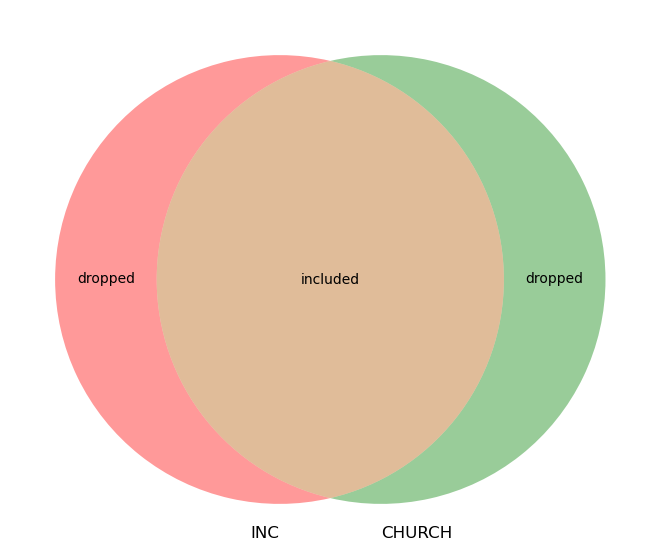

In [80]:
plt.figure(figsize=(15,7))
v = venn2(subsets = (4, 4, 10), set_labels = ('INC', 'CHURCH'))
v.get_label_by_id('100').set_text('dropped')
v.get_label_by_id('010').set_text('dropped' )
v.get_label_by_id('110').set_text('included')
plt.show()

Here we are dropping elements from both data set X and data set Y. A left join would keep all observations in data X intact and subset only from Y. 

Make sure that your resulting data sets have the correct number of rows and columns. That is, be clear about which observations are thrown away. 

**Note:** Don't make Venn diagrams in your own data project. It is just for exposition. 

In [81]:
church_table_040

FKMED,MUNICIPALITY,YEAR,Member of National Church,Not member of National Church
0,Aabenraa,2011,50190,9605
1,Aabenraa,2012,49808,9792
2,Aabenraa,2013,49157,10051
3,Aabenraa,2014,48630,10340
4,Aabenraa,2015,48314,10590
...,...,...,...,...
1282,Ærø,2019,5056,1002
1283,Ærø,2020,4956,1008
1284,Ærø,2021,4914,1046
1285,Ærø,2022,4880,1145


In [82]:
inc_table_020

,MUNICIPALITY,YEAR,AVG_FAM_INC
4304,Aabenraa,1987,131927
6213,Aabenraa,1988,138860
4612,Aabenraa,1989,147163
3307,Aabenraa,1990,152107
3881,Aabenraa,1991,160383
...,...,...,...
2291,Ærø,2017,296788
417,Ærø,2018,301614
1866,Ærø,2019,309192
955,Ærø,2020,322054


In [83]:
#We do an inner join, so that we don't have any missing values.
merged = pd.merge(church_table_040,inc_table_020,how='inner',on=['MUNICIPALITY','YEAR'])
merged

,MUNICIPALITY,YEAR,Member of National Church,Not member of National Church,AVG_FAM_INC
0,Aabenraa,2011,50190,9605,310961
1,Aabenraa,2012,49808,9792,316597
2,Aabenraa,2013,49157,10051,321225
3,Aabenraa,2014,48630,10340,324765
4,Aabenraa,2015,48314,10590,331653
...,...,...,...,...,...
1073,Ærø,2017,5227,950,296788
1074,Ærø,2018,5180,998,301614
1075,Ærø,2019,5056,1002,309192
1076,Ærø,2020,4956,1008,322054


# Analysis

To get a quick overview of the data, we show some **summary statistics** on a meaningful aggregation. 

MAKE FURTHER ANALYSIS. EXPLAIN THE CODE BRIEFLY AND SUMMARIZE THE RESULTS.

# Conclusion

ADD CONCISE CONLUSION.